# Scale-Dependent ROF Denoising Demo
In this demo we will illustrate the process of image denoising of the scale dependent ROF model.
$$
\min_{u} \frac{1}{2}\sum_{j=1}^n\lambda_j(u-f)_j^2+\sum_{j=1}^n\|(\mathbb{K}u)_j\|
$$

In [1]:
using Pkg, Random, Images, TestImages, LinearAlgebra
using AbstractOperators
using StructuredOptimization

In [2]:
include("../BilevelImagingParameterLearning.jl")
using .BilevelImagingParameterLearning

In [3]:
Random.seed!(123); # For reproductibility

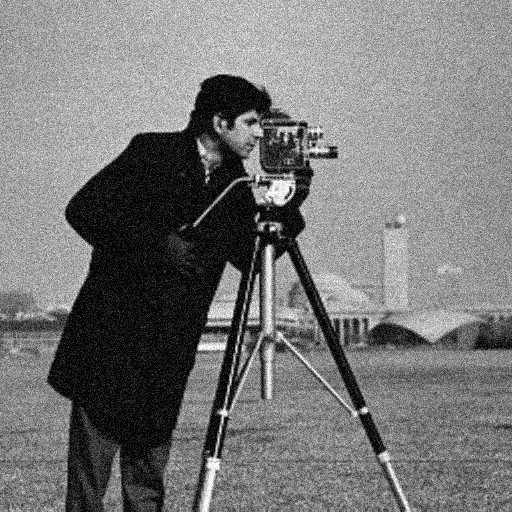

In [4]:
Xgt = testimage("cameraman")
Y = Xgt .+ sqrt(0.006*norm(Xgt,Inf))*randn(size(Xgt)) # Add noise
Y[Y .< 0] .= 0. # Make sure pixels are in range
Y[Y .> 1] .= 1.
Gray.(Y)

In [59]:
V = Variation(size(Y)) # Define the finite differences gradient operator
U = Variable(size(V,1)...)
lambda = 0.003*ones(size(Xgt))
lambda = LowerTriangular(lambda)
#lambda = 0.006
Y = float(Y);

In [62]:
@time begin
@minimize weighted_ls(-V'*U+Y,lambda) + conj(norm(U,2,1,2)) with ForwardBackward(tol = 1e-3, gamma = 1/8, fast = true) # Minimizing the dual formulation
end

  0.042265 seconds (154 allocations: 58.257 MiB, 11.96% gc time)


((Variable(Float64, (262144, 2)),), 1)

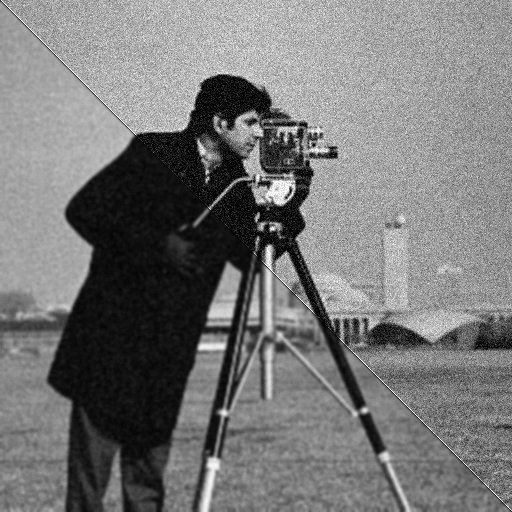

In [63]:
X = Gray.(-V'*(~U)+Y)